Subsections for tensor formulation.

- 22/11/22: basics in place and all refs present.

TODO

- Numerical examples, see https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_090420_tidy.html#E_{P,R}-tensor (and MF recon manuscript working notes?). Should be able to redo for general case working from symHarms as matrix elements (i.e. no external codes needed).
- Tidy up notation in some places.
- Full extended tensor formulation as per Appendix in MF recon paper? Probably should add in here.
   - Best working notes? Try https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basis-set_demo_050621-full.html, also try updates for MF recon manuscript in http://jake:9966/lab/tree/code-share/jupyter-shared/PEMtk_dev_2022/basisSets/PEMtk_fitting_basis-set_demo_050621-full-revisit-Jake_040822.ipynb. Q: did this make it to Figshare repo? Looks like missing? See also Trello notes...

(sec:tensor-formulation)=
# Tensor formulation of photoionization

% A number of authors have treated MFPADs and related problems [REFS]; 
% see Appendix [\[sec:theory-lit\]](#sec:theory-lit){reference-type="ref" reference="sec:theory-lit"} for some examples. 
A number of authors have treated MFPADs and related problems [REFS]; herein, a geometric tensor based formalism is developed, which is close in spirit to the treatments given by Underwood and co-workers {cite}`Reid2000,Stolow2008,Underwood2000`, but further separates various sets of physical parameters into dedicated tensors; this allows for a unified theoretical and numerical treatment, where the latter computes properties as tensor variables which can be further manipulated and investigated. Furthermore, the tensors can readily be converted to a density matrix representation {cite}`BlumDensityMat,zareAngMom`, which is more natural for some quantities, and also emphasizes the link to quantum state tomography and other quantum information techniques. Much of the theoretical background, as well as application to aspects of the current problem, can be found in the textbooks of Blum {cite}`BlumDensityMat`
and Zare {cite}`zareAngMom`.

Within this treatment, the observables can be defined in a series of simplified forms, emphasizing the quantities of interest for a given problem. Some details are defined in the following subsections,
% and further detailed in Appendix [\[appendix:formalism\]](#appendix:formalism){reference-type="ref" reference="appendix:formalism"}.

(sec:channel-funcs)=
## Channel functions

A simple form of the equations [todo: add general form elsewhere?], amenable to fitting, is to write the observables in terms of "channel functions\", which define the ionization continuum for a given case and set of parameters $u$ (e.g. defined for the MF, or defined for a specific experimental configuration),

$$\beta_{L,M}^{u}=\sum_{\zeta,\zeta'}\varUpsilon_{L,M}^{u,\zeta\zeta'}\mathbb{I}^{\zeta\zeta'}$$ (eqn:channel-fns)

Where $\zeta,\zeta'$ collect all the required quantum numbers, and
define all (coherent) pairs of components. The term
$\mathbb{I}^{\zeta\zeta'}$ denotes the coherent square of the ionization
matrix elements:

$$\mathbb{I}^{\zeta,\zeta}=I^{\zeta}(\epsilon)I^{\zeta'*}(\epsilon)
$$ (eqn:I-zeta)

This is effectively a convolution equation (cf. refs. {cite}`Reid2000,gregory2021MolecularFramePhotoelectron`) with channel functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$, for a given "experiment" $u$, summed over all terms $\zeta,\zeta'$. Aside from the change in notation (which is here chosen to match the formalism of Refs. {cite}`Gianturco1994, Lucchese1986,Natalense1999`), 
% see also Sect.[\[sec:mat-ele-conventions\]](#sec:mat-ele-conventions){reference-type="ref" reference="sec:mat-ele-conventions"}), 
these matrix elements are essentially identical to the simplified (radial) forms
$\mathbf{r}_{k,l,m}$ defined in Eqn. {eq}`eq:r-kllam`, in the case where $\zeta=k,l,m$. These complex matrix elements can also be equivalently defined in a magnitude, phase
form:

$$I^{\zeta}(\epsilon)\equiv\mathbf{r}_{\zeta}\equiv r_{\zeta}e^{i\phi_{\zeta}}$$(eqn:I-zeta-mag-phase)

This tensorial form is numerically implemented in the {{ ePSproc_repo }} codebase, and is in contradistinction to standard numerical routines in which the requisite terms are usually computed from vectorial and/or nested summations, which can be somewhat opaque to
detailed interpretation, and typically implement the full computation of the observables in one monolithic computational routine. The {{ PEMtk_repo }} codebase implements matrix element retrieval based on the tensor formalism, with pre-computation of all the geometric tensor components (channel functions) prior to a fitting protocol for matrix element analysis, essentially a fit to Eqn. {eq}`eqn:channel-fns`, with terms $I^{\zeta}(\epsilon)$ as the unknowns (in magnitude, phase form per {eq}`eqn:I-zeta-mag-phase`). The main computational cost of a tensor-based approach is that more RAM is required to store the full set of tensor variables; however, the method is computationally efficient since it is inherently parallel (as compared to a traditional, serial loop-based solution), hence may lead to significantly faster evaluation of observables. Furthermore, the method allows for the computational routines to match the formalism quite closely, and investigation of the properties of the channel functions for a given problem in general terms, as well as for specific experimental cases.

TODO: numerical examples here or below.
TODO: benchmarks, or link to them (see test fitting notebooks...?).

(sec:full-tensor-expansion)= 
## Full tensor expansion

In more detail, the channel functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$ can be given as a set of tensors, defining each aspect of the problem. The following equations illustrate this for the {{ MF }} and {{ LF }}/{{ AF }} cases, fully expanding the general form of Eq. {eq}`eqn:channel-fns` in terms of the relevant tensors. Further details and numerical examples are given in the following sub-sections.

For the MF:

$$\begin{aligned}
\beta_{L,-M}^{\mu_{i},\mu_{f}}(\epsilon) & = & (-1)^{M}\sum_{P,R',R}(2P+1)^{\frac{1}{2}}{E_{P-R}(\hat{e};\mu_{0})}\\
 & \times &\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{\Lambda_{R',R}(R_{\hat{n}};\mu,P,R,R')B_{L,-M}(l,l',m,m')}\\
 & \times & I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\epsilon)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(\epsilon)\end{aligned}$$ (eq:BLM-tensor-MF)

And the LF/AF as:

$$\begin{aligned}
\bar{\beta}_{L,-M}^{\mu_{i},\mu_{f}}(E,t) & = & (-1)^{M}\sum_{P,R',R}{[P]^{\frac{1}{2}}}{E_{P-R}(\hat{e};\mu_{0})}\\
 & \times &\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{\Lambda_{R'}(\mu,P,R')B_{L,S-R'}(l,l',m,m')}\\
 & \times &I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\epsilon)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(\epsilon)\sum_{K,Q,S}\Delta_{L,M}(K,Q,S)A_{Q,S}^{K}(t)\end{aligned}$$ (eq:BLM-tensor-AF)

In both cases a set of geometric tensor terms are required, 
% which are fully defined in Appendix [\[appendix:formalism\]](#appendix:formalism){reference-type="ref" reference="appendix:formalism"}; 
these terms provide details of:

-   ${E_{P-R}(\hat{e};\mu_{0})}$: polarization geometry & coupling with
    the electric field.

-   $B_{L,M}(l,l',m,m')$: geometric coupling of the partial waves into the $\beta_{L,M}$ terms (spherical tensors). Note for the {{ AF }} case the terms may be reindexed by $M=S-R'$, which allows for the projection dependence on the {{ ADMs }} (see below).

-   $\Lambda_{R'}(\mu,P,R')$: frame couplings and rotations.

-   $\Delta_{L,M}(K,Q,S)$: alignment frame coupling.

-   $A_{Q,S}^{K}(t)$: ensemble alignment described as a set of {term}`axis distribution moments` ({{ ADMs }}).

And $I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\epsilon)$ are the (radial)
dipole ionization matrix elements, as a function of energy $\epsilon$.
These matrix elements are essentially identical to the simplified forms
$r_{k,l,m}$ defined in Eqn. {eq}`eq:r-kllam`, except with additional indices to label
symmetry and polarization components defined by a set of partial-waves
$\{l,m\}$, for polarization component $\mu$ (denoting the photon angular
momentum components) and channels (symmetries) labelled by initial and
final state indexes $(p_{i}\mu_{i},p_{f}\mu_{f})$. The notation here
follows that used by {{ ePS_full }}, and these matrix elements again represent the quantities to be obtained numerically from data analysis, or from an [ePolyScat (or similar) calculation](https://epsproc.readthedocs.io/en/latest/ePS_ePSproc_tutorial/ePS_tutorial_080520.html#Theoretical-background).

% [Numerical example here, or already included above somewhere]

Note that, in this case as given, time-dependence arises purely from the
$A_{Q,S}^{K}(t)$ terms in the AF case, and the electric field term
currently describes only the photon angular momentum coupling, although
can in principle also describe time-dependent/shaped fields. Similarly,
a time-dependent initial state (e.g. a vibrational wavepacket) could
also describe a time-dependent MF case.

It should be emphasized, however, that the underlying physical
quantities are essentially identical in all the theoretical approaches,
with a set of coupled angular-momenta defining the geometrical part of
the photoionization problem, despite these differences in the details of
the theory and notation.

## Numerical aside: symmetry-defined channel functions

In the following sub-sections, each component is defined in detail, including numerical examples. For illustration purposes, the numerical example uses a minimal set of assumptions, and is defined initially purely by symmetry, although further terms may be required for some of the geometric terms and are discussed where required.

For this example, the $D_{2h}$ point group is used, representing a fairly general case of a planar asymmetric top system, e.g. ethylene ($C_2H_4$). Note that, in this case, the symmetrization coefficients ($b_{hl\lambda}^{\Gamma\mu}$, see {eq}`eq:symHarm-defn`) have the property that $\mu=0$ only, and the $h$ index is redundant, since it maps uniquely to $l$ - see {numref}`tab-D2hXlm` - so these indexes can be dropped. Note, also, the unfortunate convention that the label $\mu$ is used for multiple indexes; to avoid ambiguity this term is remapped to $\mu_X$ in the numerics below. However, in this case, since $\mu$ can be dropped from the symmetrization coefficients, there is actually no ambiguity in later usage.

% TODO: consider different labelling here, can set at symHarm init, dims = ['C', 'h', 'mu', 'l', 'm']

````{margin}
```{note}
Full tabulations of the parameters available in HTML or notebook formats only.
```
````

In [51]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

# Set Matplotlib inline for lmPlot() with Seaborn display
%matplotlib inline

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"
Running: 2022-11-25 12:59:34
Working dir: /home/jovyan/QM3/doc-source/part1
Build env: None

* Loading packages...
* Set Holoviews with bokeh.
Jupyter Book      : 0.13.1
External ToC      : 0.2.4
MyST-Parser       : 0.15.2
MyST-NB           : 0.13.2
Sphinx Book Theme : 0.3.3
Jupyter-Cache     : 0.4.3
NbClient          : 0.5.4


<Figure size 768x576 with 0 Axes>

In [52]:
# Setup symmetry-defined matrix elements using PEMtk

# Import class
from pemtk.sym.symHarm import symHarm

# Compute hamronics for Td, lmax=4
sym = 'D2h'
lmax=4

lmaxPlot = 2  # Set lmaxPlot for subselection on plots later.

# Glue items for later
glue("symHarmPGmatE", sym, display=False)
glue("symHarmLmaxmatE", lmax, display=False)
glue("symHarmBasislmaxPlot", lmaxPlot, display=False)

# TODO: consider different labelling here, can set at init e.g. dims = ['C', 'h', 'muX', 'l', 'm'] - 25/11/22 code currently fails for mu mapping, remap below instead
symObj = symHarm(sym,lmax)
# symObj = symHarm(sym,lmax,dims = ['Cont', 'h', 'muX', 'l', 'm'])

# To plot using ePSproc/PEMtk class, these values can be converted to ePSproc BLM data type...

# Run conversion - the default is to set the coeffs to the 'BLM' data type
dimMap = {'C':'Cont','mu':'muX'}
symObj.toePSproc(dimMap=dimMap)

# Run conversion with a different dimMap & dataType
dataType = 'matE'
# symObj.toePSproc(dimMap = {'C':'Cont','h':'it', 'mu':'muX'}, dataType=dataType)
symObj.toePSproc(dimMap = dimMap, dataType=dataType)
# symObj.toePSproc(dimMap = {'C':'Cont','h':'it'}, dataType=dataType)   # Drop mu > muX mapping for now
# symObj.coeffs[dataType]

# Example using data class (setup in init script)
data = pemtkFit()

# Set to new key in data class
dataKey = sym
data.data[dataKey] = {}

for dataType in ['matE','BLM']:
    data.data[dataKey][dataType] = symObj.coeffs[dataType]['b (comp)'].sum(['h','muX'])  # Select expansion in complex harmonics, and sum redundant dims
    data.data[dataKey][dataType].attrs = symObj.coeffs[dataType].attrs

Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim P
Added dim T
Added dim C
Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim it
Added dim Type


In [44]:
# QUICK OUTPUT CHECKS

# daTest = symObj.coeffs['XR'].copy()
# daTest.unstack().sum('h')
# daTest = daTest.unstack()
# dimMap = {'C':'Cont','h':'it', 'mu':'muX'}
# daTest = daTest.rename(dimMap) 
# daTestSum = daTest.sum('muX')
# daTestSum['b (real)']

# daTest.sel(mu=0)
# df, _ = ep.multiDimXrToPD(symObj.coeffs['matE']['b (real)'].sum(['it','muX']), colDims='l')
# df

# df, _ = ep.multiDimXrToPD(data.data[dataKey]['matE'], colDims='l')
# df

In [53]:
# Display results (real harmonics)
symObj.displayXlm(setCols='h')  #, dropLevels='mu')

# Glue version for JupyterBook output
glue("D2hXlm",symObj.displayXlm(setCols='h',returnPD=True), display=False)  # As above, but with PD object return and glue.

b                         
h                                         0    1    2    3    4    5
Character ($\Gamma$) PFIX ($\mu$) l m                               
A1g                  0            0  0  1.0                         
                                  2  0       1.0                    
                                     2            1.0               
                                  4  0                 1.0          
                                     2                      1.0     
                                     4                           1.0
A1u                  0            3 -2  1.0                         
B1g                  0            2 -2  1.0                         
                                  4 -4       1.0                    
                                    -2            1.0               
B1u                  0            1  0  1.0                         
                                  3  0       1.0                    
                                     2            1.0               
B2g                  0            2  1  1.0                         
                                  4  1       1.0                    
                                     3            1.0               
B2u                  0            1 -1  1.0                         
                                  3 -3       1.0                    
                                    -1            1.0               
B3g                  0            2 -1  1.0                         
                                  4 -3       1.0                    
                                    -1            1.0               
B3u                  0            1  1  1.0                         
                                  3  1       1.0                    
                                     3            1.0

% NOTE 28/11/22: this is currently throwing compilation errors, "! Paragraph ended before \Hy@tempa was complete." Not sure why, something in parsing order or substitution? Renders OK in output.
% See below for additional testing.
% OK WITHOUT SUBSTITUTIONS! (Or links?)
% Fails with [Photoelectron Metrology Toolkit](https://github.com/phockett/PEMtk) {cite}`hockett2021PEMtkGithub`
% OK with [Photoelectron Metrology Toolkit](https://github.com/phockett/PEMtk)
% Fails with {cite}`hockett2021PEMtkGithub` - might be this issue: https://github.com/executablebooks/jupyter-book/issues/1621, see also https://github.com/executablebooks/jupyter-book/issues/1710
% FIX: https://sphinxcontrib-bibtex.readthedocs.io/en/latest/usage.html#latex-backend-fails-with-citations-in-figure-captions

```{glue:figure} D2hXlm
---
name: "tab-D2hXlm"
---
Symmetrized harmonics coefficients ($b_{hl\lambda}^{\Gamma\mu}$, see {eq}`eq:symHarm-defn`) for {glue:text}`symHarmPGmatE` symmetry ($l_{max}=${glue:text}`symHarmLmaxmatE`) generated with the {{ PEMtk_repo }} wrapper for {{ libmsym }}. Note that, in this case, the coeffcients have the property that $\mu=0$ only, and the $h$ index is redundant (maps uniquely to $l$).

```


```{glue:figure} D2hXlm
---
name: "tab-D2hXlm"
---
Symmetrized harmonics coefficients ($b_{hl\lambda}^{\Gamma\mu}$, see {eq}`eq:symHarm-defn`) for {glue:text}`symHarmPGmatE` symmetry ($l_{max}=${glue:text}`symHarmLmaxmatE`) generated with the {{ PEMtk_repo }} wrapper for {{ libmsym }}. Note that, in this case, the coeffcients have the property that $\mu=0$ only, and the $h$ index is redundant (maps uniquely to $l$).

```

In [5]:
# ep.matEleSelector(data.data[dataKey]['matE'], thres = None, inds = {}, dims = 'Eke', sq = True, drop = True)

In [54]:
# Compute basis functions for given matrix elements
data.subKey = dataKey
BetaNormX, basis = data.afblmMatEfit(selDims={}, sqThres=False)   # Currently failing at  matEconj = matEconj.unstack('LM').rename({'l':'lp','m':'mp','mu':'mup'})
                                                                 # Issue with dims/unstack?
                                                                # UPDATE: now fixed in epsproc.geomFunc.afblmXprod, see 00ffea494d3c7290b8be8dda9979b176627f3e81

In [86]:
# The basis dictionary contains various numerical parameters, these are investigated below.
# See also the ePSproc docs at https://epsproc.readthedocs.io/en/latest/methods/geometric_method_dev_260220_090420_tidy.html
basis.keys()

dict_keys(['BLMtableResort', 'polProd', 'phaseConvention', 'BLMRenorm'])

In [57]:
# %matplotlib inline
# ep.lmPlot(basis['BLMtableResort'], xDim='L');  # Native version

[HIDDEN CELL]

## DRAFT SECTIONS from old notes

28/11/22 tidying up... roughly consolidated, but needs some work.

Sources:

- **From http://jake:9966/lab/tree/code-share/github-share/ePSproc/notebooks/methodDev/geometric_method_dev_260220_090420_tidy.ipynb**
- **From http://jake:9966/lab/tree/code-share/jupyter-shared/PEMtk_dev_2022/basisSets/PEMtk_fitting_basis-set_demo_050621-full-revisit-Jake_040822-dev-HVplot-env_tests.ipynb**
- **From MF RECON manuscript**

## Matrix element geometric coupling term $B_{L,M}$

The coupling of the partial wave pairs, $|l,m\rangle$ and $|l',m'\rangle$, into the observable set of $\{L,M\}$ is defined by a tensor contraction with two 3j terms.

$$
B_{L,M}=(-1)^{m}\left(\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
l & l' & L\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
l & l' & L\\
-m & m' & M
\end{array}\right)
$$ (eq:basis-BLM-defn)

% (See notebook ePSproc_wigner3j_dataStructures_260220.ipynb on Bemo for additonal dev details)

Note that this term is equivalent, effectively, to a triple integral over spherical harmonics (e.g. Eq. 3.119 in Zare {cite}`zareAngMom`):

\begin{equation}
\intop_{0}^{2\pi}\intop_{0}^{\pi}Y_{J_{3}M_{3}}(\theta,\phi)Y_{J_{2}M_{2}}(\theta,\phi)Y_{J_{1}M_{1}}(\theta,\phi)\sin\theta d\theta d\phi=\left(\frac{(2J_{1}+1)(2J_{2}+1)(2J_{3}+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
M_{1} & M_{2} & M_{3}
\end{array}\right)
\end{equation}

$$
\begin{aligned}
\intop_{0}^{2\pi}\intop_{0}^{\pi}Y_{J_{3}M_{3}}(\theta,\phi)Y_{J_{2}M_{2}}(\theta,\phi)Y_{J_{1}M_{1}}(\theta,\phi)\sin\theta d\theta d\phi & = & \left(\frac{(2J_{1}+1)(2J_{2}+1)(2J_{3}+1)}{4\pi}\right)^{1/2}\\
 & \times & \left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
M_{1} & M_{2} & M_{3}
\end{array}\right)
\end{aligned}
$$


And a similar term appears in the contraction over a pair of harmonics into a resultant harmonic (e.g. Eqs. C.21, C.22 in Blum {cite}`BlumDensityMat`) - this is how the term arises in the derivation of the observables.

\begin{equation}
Y_{J_{1}M_{1}}(\theta,\phi)Y_{J_{2}M_{2}}(\theta,\phi)=\sum_{J_{3}M_{3}}\left(\frac{(2J_{1}+1)(2J_{2}+1)(2J_{3}+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
M_{1} & M_{2} & M_{3}
\end{array}\right)Y^*_{J_{3}M_{3}}(\theta,\phi)
\end{equation}

$$
\begin{aligned}
Y_{J_{1}M_{1}}(\theta,\phi)Y_{J_{2}M_{2}}(\theta,\phi) & = & \sum_{J_{3}M_{3}}\left(\frac{(2J_{1}+1)(2J_{2}+1)(2J_{3}+1)}{4\pi}\right)^{1/2}\\
 & \times & \left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
M_{1} & M_{2} & M_{3}
\end{array}\right)Y_{J_{3}M_{3}}^{*}(\theta,\phi)
\end{aligned}
$$

Note also some definitions use conjugate spherical harmonics, which can be converted as, e.g., Eq. C.21 in Blum {cite}`BlumDensityMat`:

\begin{equation}
\beta_{L,M}^{\mu_{i},\mu_{f}}Y_{LM}^{*}(\theta_{\hat{k}},\phi_{\hat{k}})=\beta_{L,-M}^{\mu_{i},\mu_{f}}(-1)^{M}Y_{L,-M}(\theta_{\hat{k}},\phi_{\hat{k}})\label{eq:sph-conj-conv}
\end{equation}

% TODO: note on numerical implementation for conjugates here?

In the current {{ PEMtk_repo }} codebase, the relevant basis item can be inspected as below, in order to illustrate the sensitivity of different (L,M) terms to the matrix element products. Note for the {{ AF }} case the terms may be reindexed by $M=S-R'$ - this allows for all {{ MF }} projections to contribute, rather than just a single specified polarization geometry. However, in many typical cases, this term is nonetheless restricted to only $M=0$ components overall by other geometric factors (see below). 

The code cells below illustrate this for the current example case, and {numref}`fig-BLM-basis-D2h` offers a general summary. What do we learn here...?  In general, this is a nice way to visualize the selection rules into the observable: for instance, only terms $l=l'$ and $m=-m'$ contribute to the overall photoionization cross-section term ($L=0, M=0$), and the maximum observable $L_{max}=2l_{max}$. However, since these terms are fairly simply followed algebraically in this case, via the rules inherent in the $3j$ product, this is not particularly insightful (although useful pedagogically). These visualizations will become more useful when dealing with real sets of matrix elements, and specific polarization geometries, which will further modulate the $B_{L,M}$ terms. 

Numerically, various standard functions (Xarray or Pandas) may be used to quickly gain deeper insight, for example min/max, averages etc. Such considerations may provide a quick sanity-check for a given case, and may prove useful when planning experiments to investigate particular channels of a given system. Other properties of the basis functions may also be interrogated numerically; for instance, correlation maps provide an alternative way to check which terms are strongly correlated or coupled, or will dominate a given aspect of the observable.


% Might want {glue:text}`symHarmPGmatE` - but need to fix maths usage here first!

% This term incorporates the coupling of the partial wave pairs, $|l,m\rangle$ and $|l',m'\rangle$, into the term $B_{L,M}$, where $\{L,M\}$ are observable total angular momenta, and $M = S-R_{p}$ ([full definition here](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_090420_tidy.html#B_{L,M}-term)), hence indicates which terms are allowed for a given set of partial waves - in the current test case, $l=1,3$.

% TODO: check and illustrate formalism here, rename term!

In [93]:
# Tabulate basis (use ep.multiDimXrToPD, or other? Should have wrappers...?)

basisKey = 'BLMtableResort'  # Key for BLM basis set

pd, _ = ep.multiDimXrToPD(basis[basisKey].rename({'S-Rp':'M'}).stack({'LM':['L','M']}).dropna('LM', how='all'), colDims={'LM':['L','M']})

# Summarise properties and tabulate via Pandas Describe
pd.describe().T  # Tabulate summary info only.

count          mean           std       min           25%           50%  \
L M                                                                             
0  0   25.0  2.820948e-01  1.378496e-16  0.282095  2.820948e-01  2.820948e-01   
1 -1   32.0 -1.734723e-18  2.265840e-01 -0.325735 -2.063529e-01  0.000000e+00   
   0   32.0  2.206886e-01  3.264580e-02  0.162868  2.061013e-01  2.260532e-01   
   1   32.0 -4.119968e-18  2.265840e-01 -0.325735 -2.063529e-01  0.000000e+00   
2 -2   34.0  1.800001e-02  2.050586e-01 -0.309019 -1.802238e-01  4.029926e-02   
  -1   38.0 -1.241697e-17  1.944246e-01 -0.282095 -1.959094e-01  0.000000e+00   
   0   42.0  9.189863e-02  1.595672e-01 -0.229376  2.696725e-17  1.560783e-01   
   1   38.0 -1.241697e-17  1.944246e-01 -0.282095 -1.959094e-01  0.000000e+00   
   2   34.0  1.800001e-02  2.050586e-01 -0.309019 -1.802238e-01  4.029926e-02   
3 -3   26.0  2.135044e-18  2.106430e-01 -0.325735 -1.828881e-01  0.000000e+00   
  -2   32.0  2.924626e-02  1.868146e-01 -0.261169 -1.495193e-01  4.797737e-02   
  -1   38.0  1.460820e-18  1.731475e-01 -0.282095 -1.593413e-01  0.000000e+00   
   0   38.0  3.404875e-02  1.696744e-01 -0.203551 -1.430482e-01  5.947080e-02   
   1   38.0  3.652049e-18  1.731475e-01 -0.282095 -1.593413e-01  0.000000e+00   
   2   32.0  2.924626e-02  1.868146e-01 -0.261169 -1.495193e-01  4.797737e-02   
   3   26.0 -3.736327e-18  2.106430e-01 -0.325735 -1.828881e-01  0.000000e+00   
4 -4   19.0  2.470208e-02  2.232753e-01 -0.325735 -1.986452e-01  1.065253e-01   
  -3   26.0  1.067522e-18  1.906753e-01 -0.282095 -1.670403e-01  0.000000e+00   
  -2   33.0  1.301196e-02  1.680160e-01 -0.254875 -1.277005e-01 -4.441841e-02   
  -1   36.0  2.312965e-18  1.611500e-01 -0.282095 -1.414399e-01  0.000000e+00   
   0   39.0  5.107927e-03  1.545715e-01 -0.190365 -1.552870e-01  4.029926e-02   
   1   36.0  2.312965e-18  1.611500e-01 -0.282095 -1.414399e-01  0.000000e+00   
   2   33.0  1.301196e-02  1.680160e-01 -0.254875 -1.277005e-01 -4.441841e-02   
   3   26.0 -3.202566e-18  1.906753e-01 -0.282095 -1.670403e-01  0.000000e+00   
   4   19.0  2.470208e-02  2.232753e-01 -0.325735 -1.986452e-01  1.065253e-01   
5 -5   10.0 -5.551115e-18  2.704951e-01 -0.347235 -2.064114e-01  0.000000e+00   
  -4   16.0 -2.317139e-03  2.095109e-01 -0.294638 -2.106953e-01  5.047073e-02   
  -3   22.0  2.523234e-18  1.770806e-01 -0.259847 -1.632631e-01  0.000000e+00   
  -2   26.0 -9.062266e-04  1.622944e-01 -0.245532 -1.094799e-01 -6.339609e-02   
  -1   30.0  2.312965e-18  1.506890e-01 -0.240571 -1.195609e-01 -3.469447e-18   
   0   30.0 -2.398839e-03  1.506693e-01 -0.171327 -1.658969e-01  9.577496e-03   
   1   30.0 -1.850372e-18  1.506890e-01 -0.240571 -1.195609e-01  0.000000e+00   
   2   26.0 -9.062266e-04  1.622944e-01 -0.245532 -1.094799e-01 -6.339609e-02   
   3   22.0 -2.523234e-18  1.770806e-01 -0.259847 -1.632631e-01  0.000000e+00   
   4   16.0 -2.317139e-03  2.095109e-01 -0.294638 -2.106953e-01  5.047073e-02   
   5   10.0 -5.551115e-18  2.704951e-01 -0.347235 -2.064114e-01  0.000000e+00   
6 -6    6.0 -3.262023e-02  3.079118e-01 -0.360342 -2.030131e-01 -1.634360e-01   
  -5   10.0  5.551115e-18  2.310442e-01 -0.288917 -2.032631e-01  0.000000e+00   
  -4   14.0 -4.111636e-03  1.921930e-01 -0.246389 -1.860857e-01  3.017637e-02   
  -3   18.0  3.083953e-18  1.681093e-01 -0.252474 -1.476712e-01  0.000000e+00   
  -2   22.0  2.312079e-04  1.512537e-01 -0.242943 -1.051335e-01 -1.465033e-17   
  -1   24.0 -5.204170e-18  1.445281e-01 -0.230476 -1.076718e-01  0.000000e+00   
   0   26.0  1.024074e-03  1.386226e-01 -0.177816 -1.564780e-01 -7.112638e-03   
   1   24.0  6.360653e-18  1.445281e-01 -0.230476 -1.076718e-01  6.938894e-18   
   2   22.0  2.312079e-04  1.512537e-01 -0.242943 -1.051335e-01 -1.465033e-17   
   3   18.0 -1.541976e-18  1.681093e-01 -0.252474 -1.476712e-01  6.938894e-18   
   4   14.0 -4.111636e-03  1.921930e-01 -0.246389 -1.860857e-01  3.017637e-02   
   5   10.0 -5.551115e-18  2.310442e-

TESTED BELOW WITH CELL METADATA - FAILS, just use glue?

    "render": {
        "figure": {
            "name": "fig-BLM-basis-D2h",
            "align": "center",
            "caption": "Example $B_{L,M}$ basis functions for {glue:text}`symHarmPGmatE` symmetry . Note figure is truncated to $l_{max}=l'_{max}=${glue:text}`symHarmBasislmaxPlot` for clarity."
        }
    },
    
GLUING FROM SNS OBJECT OK WITH:

# For glue - OK in testing 28/11/22
glue("lmPlot_BLM_basis_D2h", gFig.fig, display=False)

TODO: more tests with lmPlot. Currently get plot rendered twice, but could just hide cell output as a quick-fix?
 

Plotting data (No filename), pType=r, thres=0.01, with Seaborn


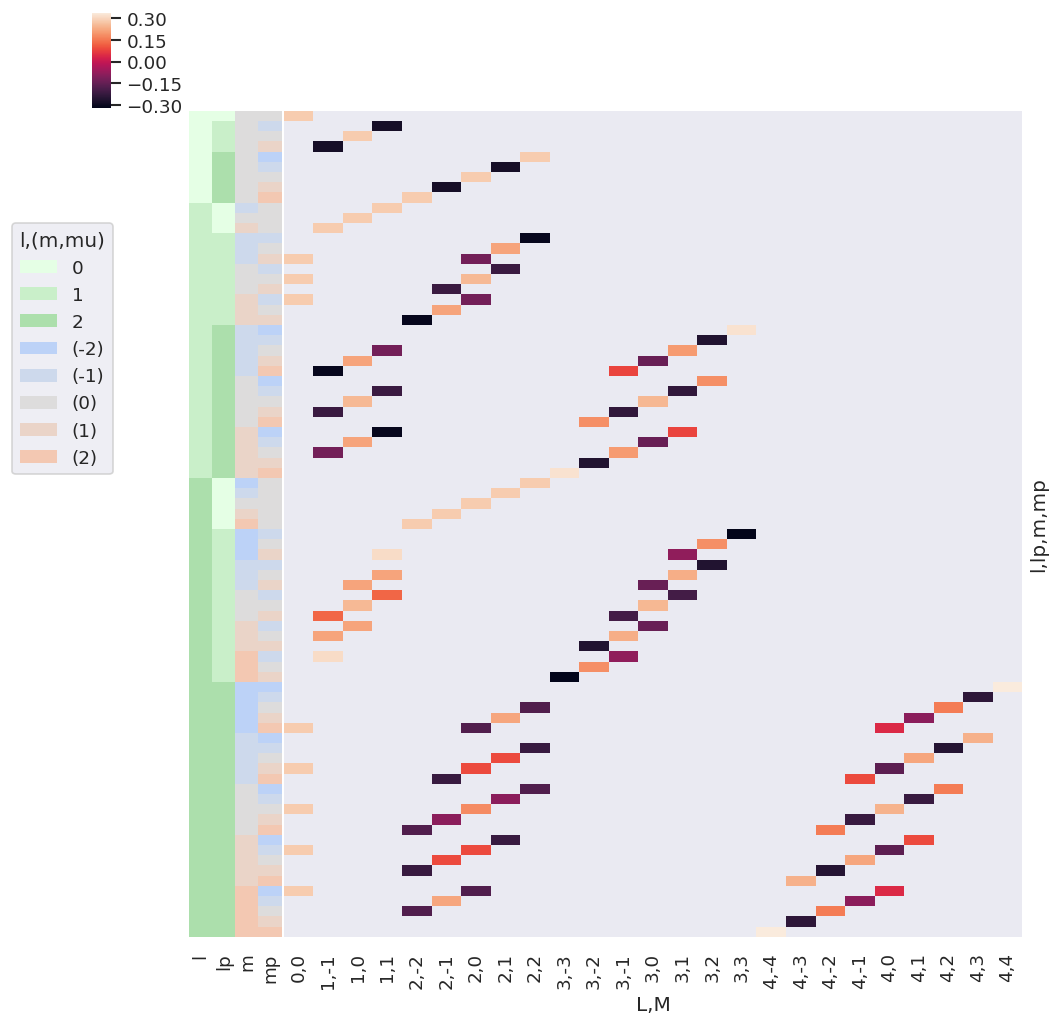

In [108]:
#*** BLM terms for basis set
basisKey = 'BLMtableResort'

# Basic plot
# ep.lmPlot(basis['BLMtableResort'], xDim='L');  # Native version

# Plot with some additional figure formatting options

cmap=None   # cmap = None for default. 'vlag' good?
# cmap = 'vlag'

labelRound = 1
catLegend=False
titleString=''
titleDetails=False
labelCols = [1,1]

# With global formatting args
# ep.lmPlot(basis[basisKey].where((basis[basisKey].l<=lmaxPlot) & (basis[basisKey].lp<=lmaxPlot)).rename({'S-Rp':'M'}).stack({'LM':['L','M']}), xDim={'LM':['L','M']},
#           cmap=cmap, labelRound = labelRound, catLegend=catLegend, titleString=titleString, titleDetails=titleDetails, labelCols = labelCols);

# With fig return - NEEDS WORK, displays but doesn't return fig object?
# UPDATE 28/11/22: still displays, but now have glue() working correctly.
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(basis[basisKey].where((basis[basisKey].l<=lmaxPlot) & (basis[basisKey].lp<=lmaxPlot)).rename({'S-Rp':'M'}).stack({'LM':['L','M']}), xDim={'LM':['L','M']},
          pType = 'r', cmap=cmap, labelRound = labelRound, catLegend=catLegend, titleString=titleString, titleDetails=titleDetails, labelCols = labelCols);

# For glue
glue("lmPlot_BLM_basis_D2h", gFig.fig, display=False)

```{glue:figure} lmPlot_BLM_basis_D2h
---
name: "fig-BLM-basis-D2h"
---
Example $B_{L,M}$ basis functions for {glue:text}`symHarmPGmatE` symmetry. Note figure is truncated to $l_{max}=l'_{max}=${glue:text}`symHarmBasislmaxPlot` for clarity.
```

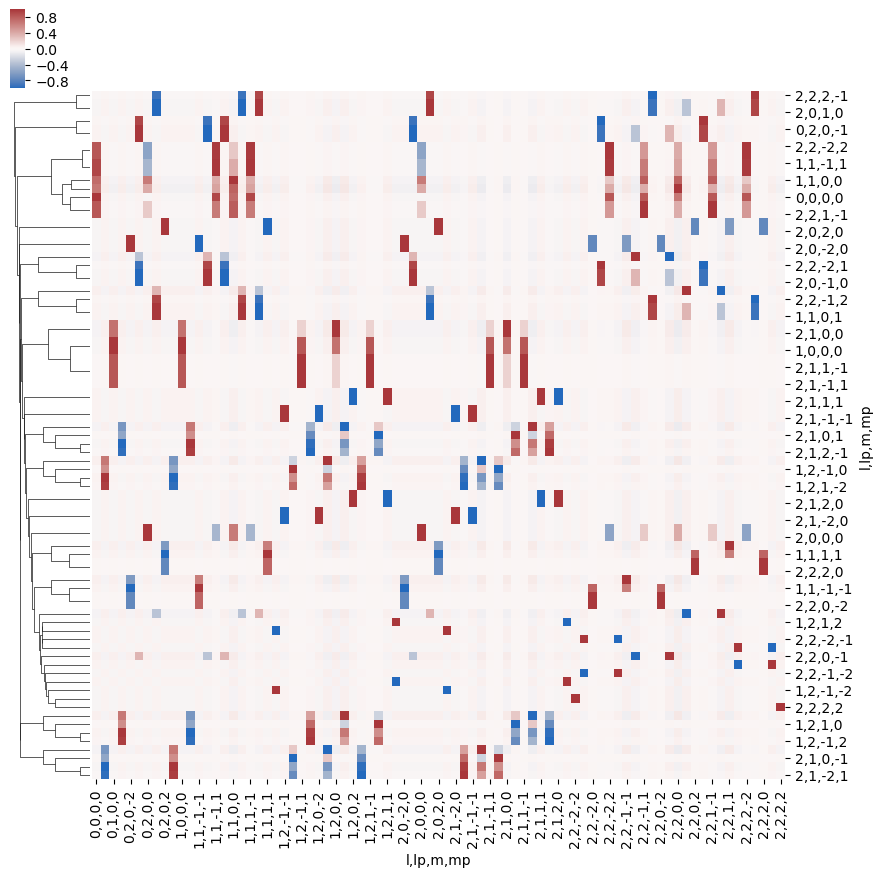

In [110]:
# Compute and plot correlation map
import epsproc._sns_matrixMod as snsMatMod  # Seaborn (SNS) code with modified clustermap function - see https://github.com/mwaskom/seaborn/pull/1393 
snsMatMod.clustermap(daPlotpd.fillna(0).T.corr(), center=0, cmap="vlag", row_cluster=True, col_cluster=False)

Plotting data (No filename), pType=r, thres=0.01, with Seaborn


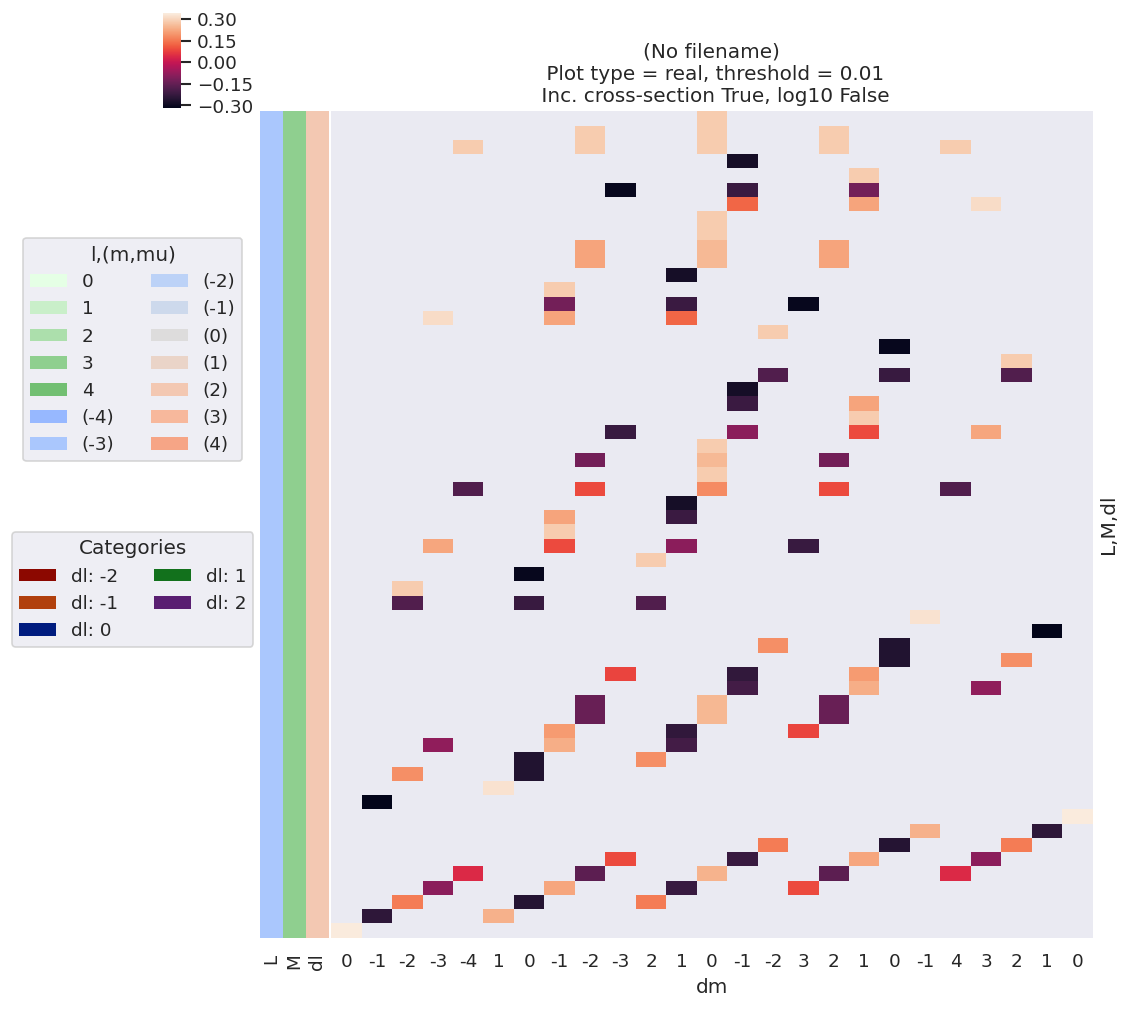

In [134]:
# PLOT AS A FN. of dl, dm... should just need to recalc dims or add a separate label for this?
# NOTE: lmPlot colour mapping currently failing for relabelled dims, whatever options are set, needs a debug!
# dl = BLMtable.l - BLMtable.lp
# dm = BLMtable.m - BLMtable.mp

BLMinput = basis[basisKey].where((basis[basisKey].l<=lmaxPlot) & (basis[basisKey].lp<=lmaxPlot)).copy()
BLMdeltas = BLMinput.unstack().rename({'S-Rp':'M'}).stack({'LM':['L','M'], 'dl':['l','lp'], 'dm':['m','mp']})
dl = BLMdeltas.l - BLMdeltas.lp
dm = BLMdeltas.m - BLMdeltas.mp

# Set new dims & plot
BLMdeltas = BLMdeltas.assign_coords(dl=dl, dm=dm)  # This works, but not plotting correctly for some reason - maybe dim names?
plotDimsRed = None   # ['dl','dm']
# BLMdeltas = BLMdeltas.assign_coords(dl=dl, dm=dm).rename({'dl':'l', 'dm':'m'})  # Hmm, same result - values present in daPlotpd not showing up here, or losing correlations...?
# plotDimsRed = ['l','m']
xDim = 'dm' # {'LM':['L','M']}
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMdeltas, plotDims=plotDimsRed, xDim=xDim, pType = 'r',)
                                               # dimMaps={'lDims':['L','dl'],'mDims':['M','dm']},
                                               # dimMaps={'lDims':['dl'],'mDims':['dm']},
                                               # lDimLabel=['dl'], mDimLabel=['dm'], labelCols=[1,1])
    
# Label/cat cmapping currently not working?

In [137]:
# Summarise properties and tabulate via Pandas Describe
daPlotpd.describe().T

,count,mean,std,min,25%,50%,75%,max
dm,,,,,,,,
0,1.0,0.337,NaN,0.337,0.337,0.337,0.337,0.337
-1,2.0,-0.279,0.058,-0.320,-0.300,-0.279,-0.259,-0.238
-2,4.0,0.111,0.201,-0.180,0.072,0.170,0.209,0.282
-3,4.0,0.089,0.206,-0.090,-0.084,0.069,0.243,0.309
-4,3.0,0.047,0.231,-0.180,-0.070,0.040,0.161,0.282
1,2.0,0.279,0.058,0.238,0.259,0.279,0.300,0.320
0,5.0,-0.261,0.031,-0.309,-0.261,-0.261,-0.255,-0.221
-1,9.0,0.180,0.128,-0.126,0.202,0.219,0.234,0.282
-2,9.0,0.058,0.199,-0.161,-0.143,0.090,0.219,0.282


In [129]:
BLMdeltas

<xarray.DataArray 'w3jStacked' (LM: 153, dl: 25, dm: 81)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * LM       (LM) MultiIndex
  - L        (LM) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8 8 8
  - M        (LM) int64 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 ... -1 0 1 2 3 4 5 6 7 8
  * dl       (dl) int64 0 -1 -2 -3 -4 1 0 -1 -2 -3 2 ... -2 3 2 1 0 -1 4 3 2 1 0
  * dm       (dm) int64 0 -1 -2 -3 -4 -5 -6 -7 -8 1 0 ... 0 -1 8 7 6 5 4 3 2 1 0
Attributes:
    dataType:   betaTerm
    phaseCons:  {'phaseConvention': 'E', 'genMatEcons': {'negm': False}, 'EPR...

In [126]:
daPlotpd  #.dropna(axis=0,how='all')

L             0         1                             2                      \
M             0        -1         0         1        -2        -1         0   
dl dm                                                                         
 0  0  0.282095       NaN       NaN       NaN       NaN       NaN       NaN   
-1  1       NaN       NaN       NaN -0.282095       NaN       NaN       NaN   
    0       NaN       NaN  0.282095       NaN       NaN       NaN       NaN   
   -1       NaN -0.282095       NaN       NaN       NaN       NaN       NaN   
-2  2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
    1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
    0       NaN       NaN       NaN       NaN       NaN       NaN  0.282095   
   -1       NaN       NaN       NaN       NaN       NaN -0.282095       NaN   
   -2       NaN       NaN       NaN       NaN  0.282095       NaN       NaN   
 1 -1       NaN       NaN       NaN  0.282095       NaN       NaN       NaN   
    0       NaN       NaN  0.282095       NaN       NaN       NaN       NaN   
    1       NaN  0.282095       NaN       NaN       NaN       NaN       NaN   
 0  0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -2  0.282095       NaN       NaN       NaN       NaN       NaN -0.126157   
    1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
    0  0.282095       NaN       NaN       NaN       NaN       NaN  0.252313   
   -1       NaN       NaN       NaN       NaN       NaN -0.218510       NaN   
    2  0.282095       NaN       NaN       NaN       NaN       NaN -0.126157   
    1       NaN       NaN       NaN       NaN       NaN  0.218510       NaN   
    0       NaN       NaN       NaN       NaN -0.309019       NaN       NaN   
-1  1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
    0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -1       NaN       NaN       NaN -0.126157       NaN       NaN       NaN   
   -2       NaN       NaN  0.218510       NaN       NaN       NaN       NaN   
   -3       NaN -0.309019       NaN       NaN       NaN       NaN       NaN   
    2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
    1       NaN       NaN       NaN -0.218510       NaN       NaN       NaN   
    0       NaN       NaN  0.252313       NaN       NaN       NaN       NaN   
   -1       NaN -0.218510       NaN       NaN       NaN       NaN       NaN   
   -2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
    3       NaN       NaN       NaN -0.309019       NaN       NaN       NaN   
    2       NaN       NaN  0.218510       NaN       NaN       NaN       NaN   
    1       NaN -0.126157       NaN       NaN       NaN       NaN       NaN   
    0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 2 -2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
    0       NaN       NaN       NaN       NaN       NaN       NaN  0.282095   
    1       NaN       NaN       NaN       NaN       NaN  0.282095       NaN   
    2       NaN       NaN       NaN       NaN  0.282095       NaN       NaN   
 1 -1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -3       NaN       NaN       NaN  0.309019       NaN       NaN       NaN   
    0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
   -1       NaN       NaN       NaN  0.218510       NaN       NaN       NaN   
   -2       NaN       NaN  0.218510       NaN       NaN       NaN       NaN   
    1       NaN       NaN       NaN  0.126157     

(sec:density-mat-basic)=
## Density matrix representation

The density operator associated with the continuum state in
Eq. {eq}`eq:continuum-state-vec` is easily written as $\hat{\rho}=|\Psi_c\rangle\langle\Psi_c|$. In the channel function basis, this leads to a density matrix given by the radial matrix
elements:

% $$\mathbf{\rho}^{\zeta\zeta'} = \mathbb{I}^{\zeta,\zeta'}
% $$ (eqn:radial-density-mat)

$$\boldsymbol{\rho}^{\zeta\zeta'} = \mathbb{I}^{\zeta,\zeta'}
$$ (eqn:radial-density-mat)

Since the matrix elements characterise the scattering event, the density matrix provides an equivalent characterisation of the scattering event. 
% An example case is discussed in Sect. [\[sec:den-mat-N2\]](#sec:den-mat-N2){reference-type="ref" reference="sec:den-mat-N2"} (see Fig. [11](#998904){reference-type="ref" reference="998904"}); for more details, and further discussion, see Sect. [\[sec:density-mat-full\]](#sec:density-mat-full){reference-type="ref" reference="sec:density-mat-full"}.

Further discussion can also be found in the literature, see, e.g., Ref. {cite}`BlumDensityMat` for general discussion, Ref. {cite}`Reid1991` for application in pump-probe schemes.

TODO: numerical examples here